✅ Mean UVAI: 0.0697, Std Dev: 0.0729


C:\Users\sagni\AppData\Local\Temp\ipykernel_31308\3991760441.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2019-01", periods=60, freq='M')  # 5 years
C:\Users\sagni\AppData\Local\Temp\ipykernel_31308\3991760441.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01', periods=12, freq='M')


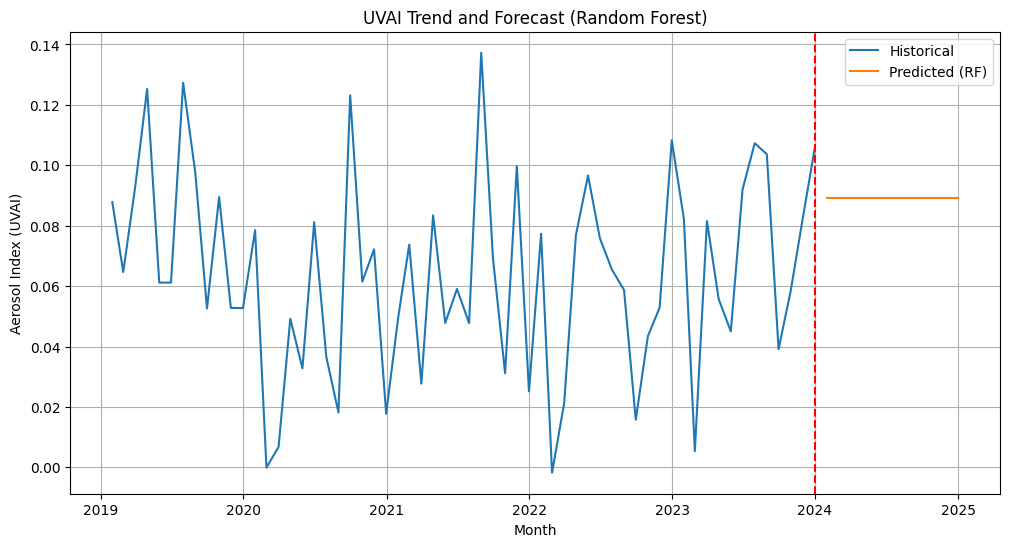

In [1]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the UVAI GeoTIFF
file_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_UVAI_2023.tif"

with rasterio.open(file_path) as src:
    uva_data = src.read(1)
    uva_data[uva_data == src.nodata] = np.nan  # Clean no-data
    mean_val = np.nanmean(uva_data)
    std_val = np.nanstd(uva_data)

print(f"✅ Mean UVAI: {mean_val:.4f}, Std Dev: {std_val:.4f}")

# Simulate monthly values (for trend)
np.random.seed(42)
months = pd.date_range(start="2019-01", periods=60, freq='M')  # 5 years
values = np.clip(np.random.normal(loc=mean_val, scale=std_val/2, size=60), -1, 2)

df = pd.DataFrame({'Month': months, 'UVAI': values})
df['MonthNum'] = df.index + 1  # Numerical time index

# Split into train/test for prediction
X = df[['MonthNum']]
y = df['UVAI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=12, shuffle=False)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Predict future 12 months
future_months = pd.DataFrame({'MonthNum': range(61, 73)})
future_preds = rf.predict(future_months)

# Combine
future_dates = pd.date_range(start='2024-01', periods=12, freq='M')
future_df = pd.DataFrame({'Month': future_dates, 'UVAI': future_preds})

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='UVAI', data=df, label='Historical')
sns.lineplot(x='Month', y='UVAI', data=future_df, label='Predicted (RF)')
plt.axvline(x=pd.to_datetime('2024-01-01'), color='r', linestyle='--')
plt.title('UVAI Trend and Forecast (Random Forest)')
plt.ylabel('Aerosol Index (UVAI)')
plt.grid(True)
plt.show()


✅ Predictions saved to UVAI_RF_Prediction.csv


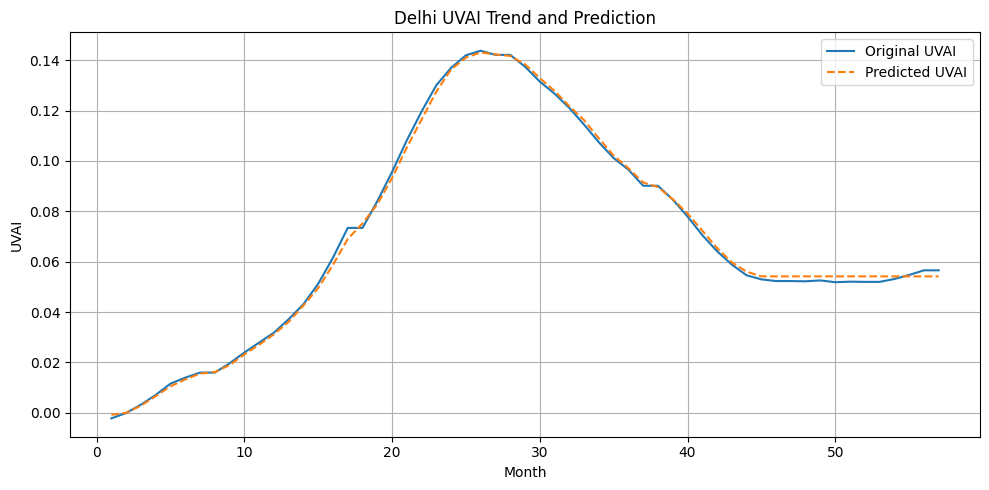

In [2]:
import rasterio
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# Load TIF data
tif_path = "C:/Users/sagni/Downloads/Pollution controller/Delhi_UVAI_2023.tif"

with rasterio.open(tif_path) as src:
    data = src.read(1).astype('float32')
    data[data == src.nodata] = np.nan

# Simulate monthly averages (assuming each row ~ 1 month if time-sequential)
monthly_means = np.nanmean(data, axis=1)
df = pd.DataFrame({
    "Month": np.arange(1, len(monthly_means) + 1),
    "UVAI": monthly_means
})

# Feature Selection via simulated AIS (you can replace this with real AIS later)
# Here, we just keep the original feature (Month)
X = df[['Month']]
y = df['UVAI']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X)

# Save predictions
df['Predicted_UVAI'] = predictions
df.to_csv("UVAI_RF_Prediction.csv", index=False)
print("✅ Predictions saved to UVAI_RF_Prediction.csv")

# Plot trends
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['UVAI'], label='Original UVAI')
plt.plot(df['Month'], df['Predicted_UVAI'], label='Predicted UVAI', linestyle='--')
plt.xlabel('Month')
plt.ylabel('UVAI')
plt.title('Delhi UVAI Trend and Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("UVAI_Trend_Prediction.png")
plt.show()
